# StaffDB Data Review

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from config import pg_pwd
import psycopg2 
import numpy as np

In [2]:
#db initializations
engine = create_engine(f'postgresql://{pg_pwd}/StaffDB')
connection = engine.connect()

In [3]:
#dataframes from db queries
employees_df = pd.read_sql("select emp_no, emp_title_id title_id from employees", connection)
salaries_df = pd.read_sql("select emp_no, salary from salaries", connection)
titles_df = pd.read_sql("select title_id, title from titles", connection)

In [4]:
#join tables on common column and type
dtype = dict(emp_no=int)
emp_salary_df = pd.merge(employees_df.astype(dtype), salaries_df.astype(dtype), on='emp_no', how='inner')
emp_salary_df = pd.merge(emp_salary_df, titles_df, on="title_id", how='inner')

## View Salary Distribution

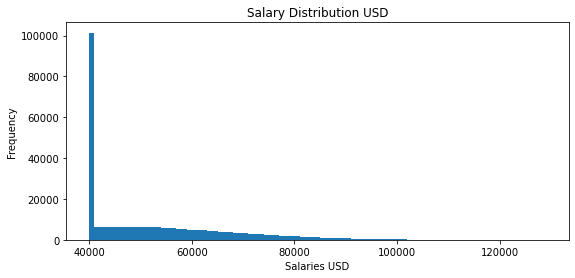

In [5]:
#find range and graph histogram
emp_max = emp_salary_df['salary'].max()
emp_min = emp_salary_df['salary'].min()

ax = emp_salary_df['salary'].plot(kind='hist', figsize=(9,4), bins=np.arange(emp_min, emp_max, 1000, dtype=int))
ax.set_title("Salary Distribution USD")
ax.set_xlabel("Salaries USD")
ax.get_figure().savefig("b1_full_histogram")

Viewing increments of 1000, the histogram shows a large concentration of salaries between 40-41k.

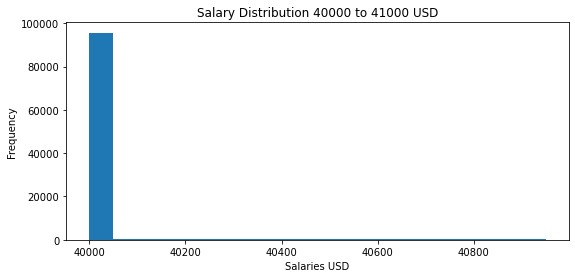

In [6]:
#narrow in on standout salaries
ax = emp_salary_df['salary'].plot(kind='hist', figsize=(9,4), bins=np.arange(40000, 41000, 50, dtype=int))
ax.set_title("Salary Distribution 40000 to 41000 USD")
ax.set_xlabel("Salaries USD")
ax.get_figure().savefig("b2_histogram_40000_to_41000")

Narrowing in with increment of 50, the histogram shows the large concentration of salaries between 40000-40050.

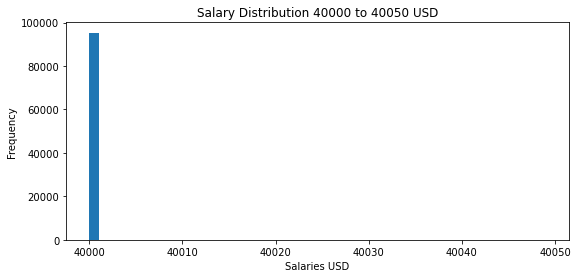

In [7]:
#narrow in on standout salaries
ax = emp_salary_df['salary'].plot(kind='hist', figsize=(9,4), bins=np.arange(40000, 40050, 1, dtype=int))
ax.set_title("Salary Distribution 40000 to 40050 USD")
ax.set_xlabel("Salaries USD")
ax.get_figure().savefig("b3_histogram_40000_to_40050")

Narrowing in with increment of 1, the histogram shows the large concentration of salaries is at 40000 which may indicate that the dataset is fake.

## Test salary distribution excluding 40000 salary

In [8]:
#create test dataframe, find range
emp_testsalary_df = emp_salary_df[emp_salary_df["salary"] != 40000]
emp_testmax = emp_testsalary_df['salary'].max()
emp_testmin = emp_testsalary_df['salary'].min()

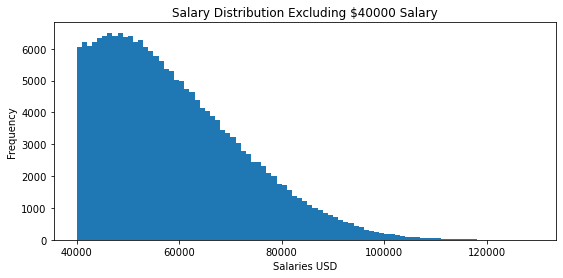

In [9]:
# graph histogram
ax = emp_testsalary_df['salary'].plot(kind='hist', figsize=(9,4), bins=np.arange(emp_testmin, emp_testmax, 1000, dtype=int))
ax.set_title("Salary Distribution Excluding $40000 Salary")
ax.set_xlabel("Salaries USD")
ax.get_figure().savefig("b4_histogram_exclude_40000")

The histogram of the salary data excluding the 40000 salaries has a natural appears and may furthur indicate that the dataset is fake.

## Average Salary by Title

In [10]:
emp_salary_df = emp_salary_df[['salary','title']]

average_titles_df = emp_salary_df.groupby(['title']).aggregate(['mean'])["salary"].reset_index().round(decimals=2)
average_titles_df.columns=['Title','Average']
average_titles_df.sort_values(by = 'Average', inplace=True)

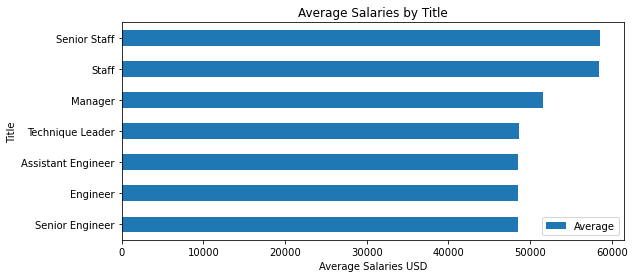

In [11]:
# plot bars using Pandas.
ax = average_titles_df.plot(kind='barh', figsize=(9,4))
ax.set_title("Average Salaries by Title")
ax.set_xlabel("Average Salaries USD")
ax.set_ylabel("Title")
ax.set_yticklabels(average_titles_df['Title'])
ax.get_figure().savefig("b5_average_salary")